# hovmoller series

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm
from dask.distributed import Client
from collections import OrderedDict
import xarray as xr

import IPython.display
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd



In [2]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_1.db')

In [3]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable = 'temp_global_ave'
darray_warm = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
darray_warm
annual_average_warm = darray_warm.groupby('time.year').mean(dim='time')
darray_swarm = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm = darray_swarm.groupby('time.year').mean(dim='time')
temp_warm = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm = temp_warm.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_warm = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')


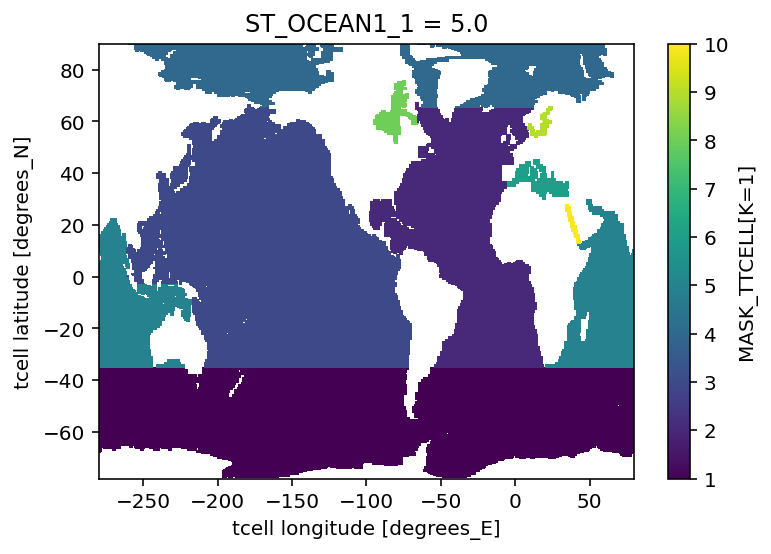

In [6]:
basinmask = xr.open_dataset('/scratch/e14/cy8964/access-om2/mask/basin_mask.nc')
basinmask.BASIN_MASK.plot()

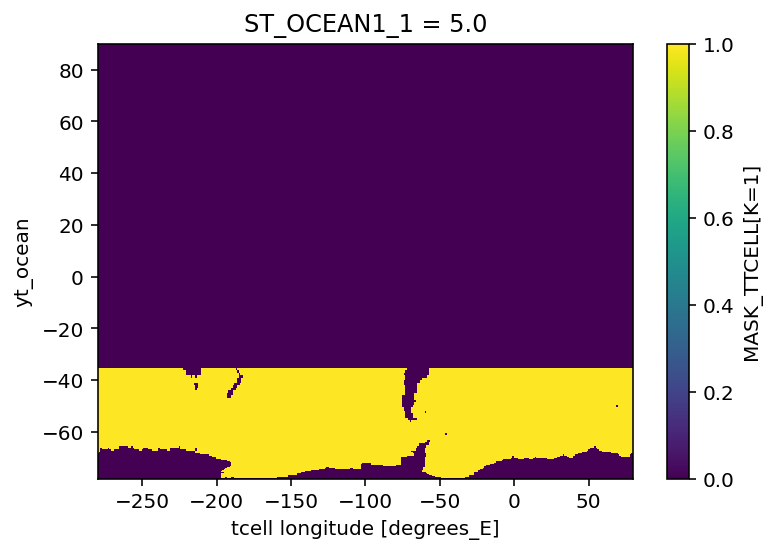

In [7]:
southern_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK < 2)).isel(ST_OCEAN1_1 = 0).fillna(0)
southern_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
southern_mask = southern_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
southern_mask.plot()

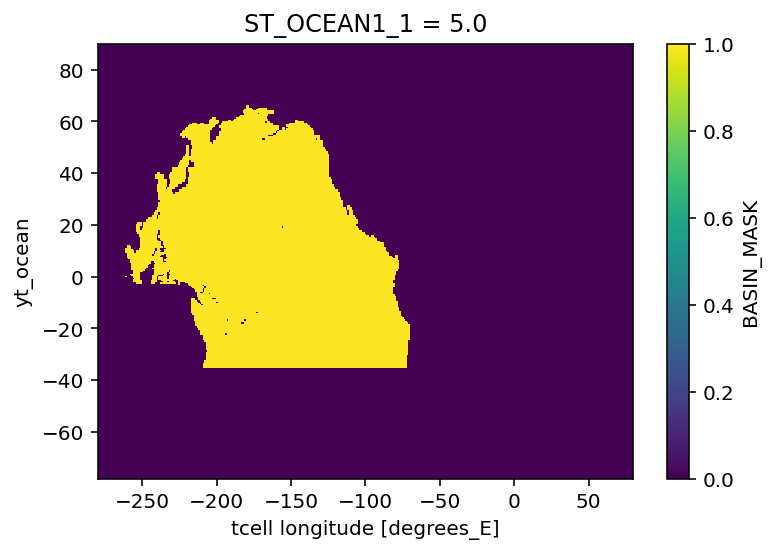

In [8]:
pacific_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 2).where(basinmask.BASIN_MASK < 4)/3).isel(ST_OCEAN1_1 = 0).fillna(0)
pacific_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
pacific_mask = pacific_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
pacific_mask.plot()

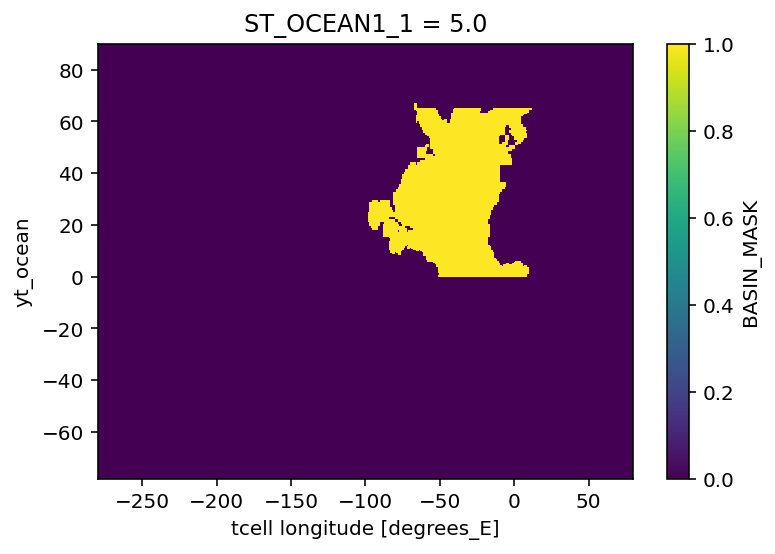

In [9]:
north_atlantic_mask = (basinmask.BASIN_MASK.where(basinmask.YT_OCEAN > 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).fillna(0)
north_atlantic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
north_atlantic_mask = north_atlantic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
north_atlantic_mask.plot()

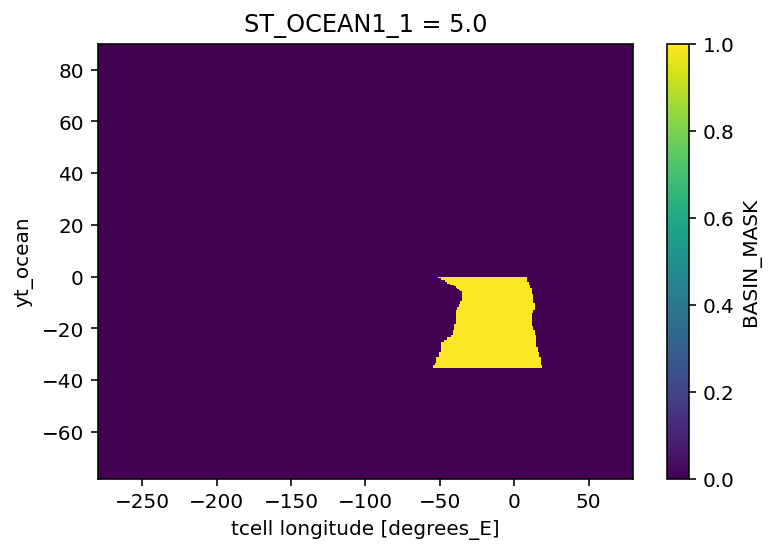

In [10]:
south_atlantic_mask = (basinmask.BASIN_MASK.where(basinmask.YT_OCEAN < 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).fillna(0)
south_atlantic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
south_atlantic_mask = south_atlantic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
south_atlantic_mask.plot()

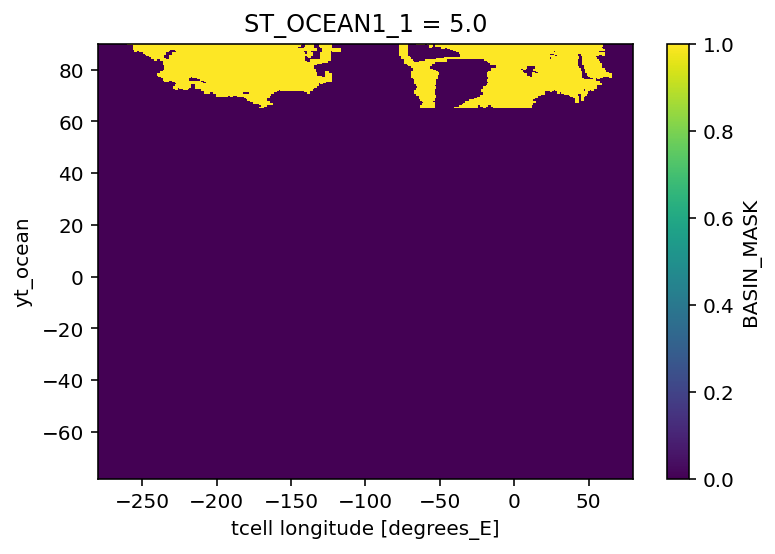

In [11]:
arctic_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 3).where(basinmask.BASIN_MASK < 5)/4).isel(ST_OCEAN1_1 = 0).fillna(0)
arctic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
arctic_mask = arctic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
arctic_mask.plot()

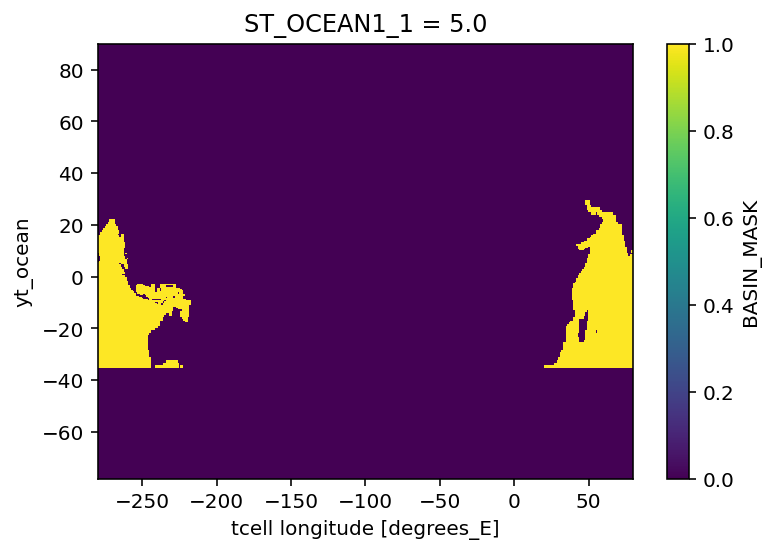

In [12]:
indian_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 4).where(basinmask.BASIN_MASK < 6)/5).isel(ST_OCEAN1_1 = 0).fillna(0)
indian_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
indian_mask = indian_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
indian_mask.plot()

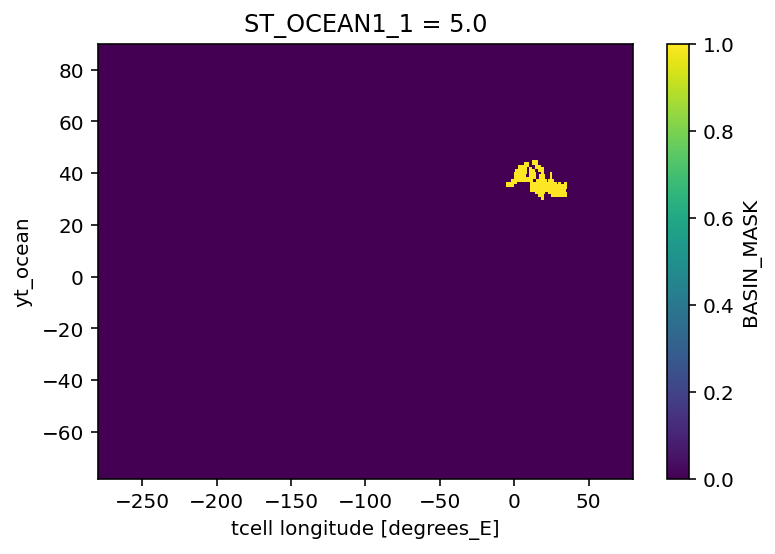

In [13]:
mediterranean_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 5).where(basinmask.BASIN_MASK < 7)/6).isel(ST_OCEAN1_1 = 0).fillna(0)
mediterranean_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
mediterranean_mask = mediterranean_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
mediterranean_mask.plot()

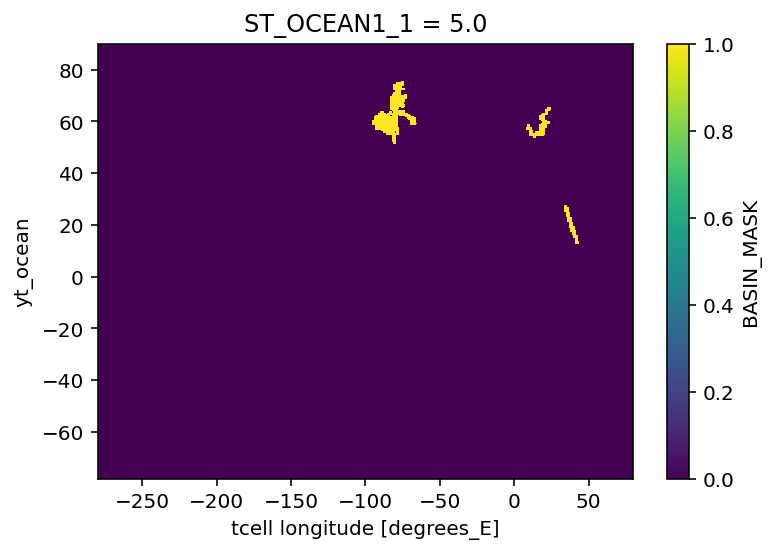

In [14]:
extra_mask1 = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 7).where(basinmask.BASIN_MASK < 9)/8).isel(ST_OCEAN1_1 = 0).fillna(0)
extra_mask2 = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 8).where(basinmask.BASIN_MASK < 10)/9).isel(ST_OCEAN1_1 = 0).fillna(0)
extra_mask3 = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 9)/10).isel(ST_OCEAN1_1 = 0).fillna(0)

extra_mask = extra_mask1+extra_mask2+extra_mask3
extra_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
extra_mask = extra_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
extra_mask.plot()

In [15]:
rho_0 = 1030#kg/m^3
c_p = 3992 #J/kg/K


In [16]:
expt = '1deg_jra55_ryf_RCPcont'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_cont = (rho_0*c_p*darray1*darray2).sum('st_ocean')

In [17]:
expt = '1deg_jra55_ryf_RCPcont'
net_sfc_heating_cont = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
frazil_cont = cc.querying.getvar(expt,'frazil_3d_int_z',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))

surface_heat_flux_cont = net_sfc_heating_cont+frazil_cont 

In [24]:
def heat_cont(ekey,basin_mask, year):
    rho_0 = 1030#kg/m^3
    c_p = 3992 
    expt = exptdict[ekey]['expt']
    variable1 = 'temp'
    darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
    variable2 = 'dzt'
    darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
    variable3 = 'area_t'
    darray3 = cc.querying.getvar(expt, variable3, session,n=1)
    vertically_integrated_heat_warm = (rho_0*c_p*darray1*darray2).sum('st_ocean')
    
    basin_heat_content = ((vertically_integrated_heat_warm-vertically_integrated_heat_cont)*basin_mask*darray3).groupby('time.year').mean('time').isel(year = year).sum('xt_ocean').sum('yt_ocean').values
    net_sfc_heating = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    frazil = cc.querying.getvar(expt,'frazil_3d_int_z',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    surface_heat_flux = net_sfc_heating+frazil
    month_length = surface_heat_flux.time.dt.days_in_month

    basin_surface_int = (((surface_heat_flux-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    return basin_heat_content, basin_surface_int

In [4]:
exptdict = OrderedDict([
    ('Control',  {'expt':'1deg_jra55_ryf_RCPcont'}),
    ('Warming',  {'expt':'1deg_jra55_ryf_RCPwarmhumid'}),
    ('Warming x2',  {'expt':'1deg_jra55_ryf_RCPwarmhumid2x'}),
    ('Cooling',  {'expt':'1deg_jra55_ryf_RCPcoolhumid'}),
    ('Cooling x2',  {'expt':'1deg_jra55_ryf_RCPcoolhumid2x'}),
    ('Warming w/o humidity',  {'expt':'1deg_jra55_ryf_rcpwarm'}),
    ('Cooling w/o humidity',  {'expt':'1deg_jra55_ryf_rcpcool'}),
    ('Cooling w/o humidity2', {'expt':'1deg_jra55_ryf_RCPcool'}),
    ('Windup', {'expt':'1deg_jra55_ryf_red3DSK_C9'})

])

In [5]:
def custom_div_cmap(numcolors=21, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap


In [6]:
expt = '1deg_jra55_ryf_RCPcont'
ht = cc.querying.getvar(expt,'ht',session,n=-1)
land_mask = ~ht.isnull()

south_map = (land_mask.where(land_mask.yt_ocean < -34)).fillna(0) 
indo_map1 = (land_mask.where(land_mask.yt_ocean < 9).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-65)).fillna(0) 
indo_map2 = (land_mask.where(land_mask.yt_ocean < 15).where(land_mask.yt_ocean > 9).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-83.7)).fillna(0) 
indo_map3 = (land_mask.where(land_mask.yt_ocean < 17).where(land_mask.yt_ocean > 15).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-93.3)).fillna(0) 
indo_map4 = (land_mask.where(land_mask.yt_ocean < 85).where(land_mask.yt_ocean > 17).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-99)).fillna(0) 
indo_map5 = (land_mask.where(land_mask.yt_ocean < 30.5).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >25).where(land_mask.xt_ocean<80)).fillna(0) 
indo_sector_map = indo_map1 + indo_map2 + indo_map3 + indo_map4 + indo_map5 + south_map
indo_sector_mask = indo_sector_map.where(indo_sector_map>0)
atlantic_sector_map = (indo_sector_mask * 0).fillna(1) * land_mask
atlantic_sector_map = atlantic_sector_map + south_map
atlantic_sector_mask = atlantic_sector_map.where(atlantic_sector_map>0)
south_map = (land_mask.where(land_mask.yt_ocean < -34)).fillna(0) 
indo_map1 = (land_mask.where(land_mask.yt_ocean < 9).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-65)).fillna(0) 
indo_map2 = (land_mask.where(land_mask.yt_ocean < 15).where(land_mask.yt_ocean > 9).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-83.7)).fillna(0) 
indo_map3 = (land_mask.where(land_mask.yt_ocean < 17).where(land_mask.yt_ocean > 15).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-93.3)).fillna(0) 
indo_map4 = (land_mask.where(land_mask.yt_ocean < 85).where(land_mask.yt_ocean > 17).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-99)).fillna(0) 
indo_map5 = (land_mask.where(land_mask.yt_ocean < 30.5).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >25).where(land_mask.xt_ocean<80)).fillna(0) 
indo_sector_map = indo_map1 + indo_map2 + indo_map3 + indo_map4 + indo_map5 + south_map
indo_sector_mask = indo_sector_map.where(indo_sector_map>0)
atlantic_sector_map = (indo_sector_mask * 0).fillna(1) * land_mask
atlantic_sector_map = atlantic_sector_map + south_map
atlantic_sector_mask = atlantic_sector_map.where(atlantic_sector_map>0)

psi = cc.querying.getvar(expt,'ty_trans_rho',session, n=1) ## needs to be the same coordinates as what you want to mask
atlantic_sector_mask.coords['xt_ocean'] = psi.grid_xt_ocean.values
atlantic_sector_mask.coords['yt_ocean'] = psi.grid_yu_ocean.values
atlantic_sector_mask = atlantic_sector_mask.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yu_ocean'})
indo_sector_mask.coords['xt_ocean'] = psi.grid_xt_ocean.values
indo_sector_mask.coords['yt_ocean'] = psi.grid_yu_ocean.values
indo_sector_mask = indo_sector_mask.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yu_ocean'})




In [7]:
    def heatfunc(ekey,start_time,end_time, masktrue, mask):
        expt = exptdict[ekey]['expt']

        if masktrue == False:
            psi = cc.querying.getvar(expt,'ty_trans_nrho',session, ncfile = 'ocean.nc', start_time = start_time, end_time = end_time).sel(time = slice(start_time,end_time))
            psi = psi.sum('grid_xt_ocean')
            
            psiGM = cc.querying.getvar(expt,'ty_trans_nrho_gm',session,start_time = start_time, end_time = end_time).sel(time = slice(start_time,end_time))
            psiGM = (psiGM).sum('grid_xt_ocean')
            psisubmeso = cc.querying.getvar(expt,'ty_trans_nrho_submeso',session,start_time = start_time, end_time = end_time).sel(time = slice(start_time,end_time))
            psisubmeso = (psisubmeso).sum('grid_xt_ocean')
            
        else:
            
            psi = cc.querying.getvar(expt,'ty_trans_nrho',session, ncfile = 'ocean.nc', start_time = start_time, end_time = end_time).sel(time = slice(start_time,end_time))
            psi = psi*mask
            psi = psi.sum('grid_xt_ocean')
            psiGM = cc.querying.getvar(expt,'ty_trans_nrho_gm',session,start_time = start_time, end_time = end_time).sel(time = slice(start_time,end_time))
            psiGM = (psiGM*mask).sum('grid_xt_ocean')
            psisubmeso = cc.querying.getvar(expt,'ty_trans_nrho_submeso',session,start_time = start_time, end_time = end_time).sel(time = slice(start_time,end_time))
            psisubmeso = (psisubmeso*mask).sum('grid_xt_ocean')

    
        rho = 1025 # mean density of sea-water in kg/m^3
        psi = psi / (1e6*rho) # converts kg/s to Sv
        psiGM = psiGM / (1e6*rho)
        psisubmeso = psisubmeso / (1e6*rho)

        psi_avg = psi.cumsum('neutral').mean('time') - psi.sum('neutral').mean('time')
        psi_avg = psi_avg + psiGM.mean('time')+ psisubmeso.mean('time')
        psi_avg.load()

        SST_max = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = start_time, end_time = end_time).isel(st_ocean = 0).max('time').max('xt_ocean') -273.15#.isel(time = np.arange(40,50))
        SST_min = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = start_time, end_time = end_time).isel(st_ocean = 0).min('time').min('xt_ocean') -273.15
    
    

        rho_0 = 1030#kg/m^3
        c_p = 3992 
        A_I = -rho_0*c_p*psi_avg.cumsum('neutral')*0.5 #(0.5 is size of d\theta)
        A_I = A_I/10**9 # convert to PW
        #A_I_contatlantic= (A_I_contatlantic).where(psi_avg_contatlantic!=0).fillna(0)
        return psi_avg, A_I, SST_min, SST_max

In [8]:
    def heatfuncforamoc(ekey,masktrue, mask):
        expt = exptdict[ekey]['expt']

        if masktrue == False:
            psi = cc.querying.getvar(expt,'ty_trans_nrho',session, ncfile = 'ocean.nc')
            psi = psi.sum('grid_xt_ocean')
            
            psiGM = cc.querying.getvar(expt,'ty_trans_nrho_gm',session)
            psiGM = (psiGM).sum('grid_xt_ocean')
            psisubmeso = cc.querying.getvar(expt,'ty_trans_nrho_submeso',session)
            psisubmeso = (psisubmeso).sum('grid_xt_ocean')
            
        else:
            
            psi = cc.querying.getvar(expt,'ty_trans_nrho',session, ncfile = 'ocean.nc')
            psi = psi*mask
            psi = psi.sum('grid_xt_ocean')
            psiGM = cc.querying.getvar(expt,'ty_trans_nrho_gm',session)
            psiGM = (psiGM*mask).sum('grid_xt_ocean')
            psisubmeso = cc.querying.getvar(expt,'ty_trans_nrho_submeso',session)
            psisubmeso = (psisubmeso*mask).sum('grid_xt_ocean')

    
        rho = 1025 # mean density of sea-water in kg/m^3
        psi = psi / (1e6*rho) # converts kg/s to Sv
        psiGM = psiGM / (1e6*rho)
        psisubmeso = psisubmeso / (1e6*rho)

        psi_avg = psi.cumsum('neutral') - psi.sum('neutral')
        psi_avg = psi_avg + psisubmeso
        psi_avg.load()   
    
        rho_0 = 1030#kg/m^3
        c_p = 3992 
        A_I = -rho_0*c_p*psi_avg.cumsum('neutral')*0.5 #(0.5 is size of d\theta)
        A_I = A_I/10**9 # convert to PW
        #A_I_contatlantic= (A_I_contatlantic).where(psi_avg_contatlantic!=0).fillna(0)
        return psi_avg, A_I

# AMOC

In [9]:
psi_avg_cont = heatfuncforamoc('Control',True, atlantic_sector_mask)
psi_avg_warm = heatfuncforamoc('Control',True, atlantic_sector_mask)
psi_amoc_warm = psi_amoc_warm.sel(neutral=slice(None,15)).min('neutral').resample(time='Y').mean()
psi_avg_cont = psi_amoc_cont.sel(neutral=slice(None,15)).min('neutral').resample(time='Y').mean()

(psi_amoc_warm-psi_avg_cont).plot(label=ekey,linestyle = linestyles[ekey])

NameError: name 'psi_amoc_warm' is not defined

# Plotting functions

In [42]:
##anomaly in psi
def plot_psi_anom(start_time,end_time,basinTrue, basin,title):
    fig, axes = plt.subplots(ncols=4, nrows=1, figsize = (20,6))
    #start_time = '2900-01-01'
    #end_time = '2901-01-01'
    #basin = atlantic_sector_mask
    psi_avg_cont, A_I_cont, Sminc, Smaxc = heatfunc('Control',start_time,end_time, basinTrue, basin)
    psi_avg_warm, A_I_warm,Sminw,Smaxw = heatfunc('Warming x2',start_time,end_time, basinTrue, basin)
    psi_avg_cool, A_I_cool,Sminco,Smaxco = heatfunc('Cooling x2',start_time,end_time, basinTrue, basin)
    plt.suptitle('Basin: '+title+'    Time: '+start_time+' to '+end_time)
    expt = '1deg_jra55_ryf_RCPcont'
    n=21
    bwr_custom = custom_div_cmap(59)
    clev = np.linspace(-30,30,61)
    #clev = np.arange(-1.5,1.55,0.125)
    cs = axes[0].contourf(psi_avg_cont.grid_yu_ocean,psi_avg_cont.neutral, psi_avg_cont, cmap=bwr_custom, levels=clev, extend='both', add_colorbar = True)
    Sminc.plot(color = 'k', linestyle = 'dotted', ax = axes[0])
    Smaxc.plot(color = 'k', linestyle = '--', ax = axes[0])
    #cb=plt.colorbar(orientation='vertical', shrink = 0.7)
#cb.ax.set_xlabel('PW')
    axes[0].set_ylabel('Temperature $\Theta $ ($^{\circ}$C)')
    axes[0].set_xlabel('Latitude ($^\circ$N)')
    axes[0].set_xlim([-75,80])
    axes[0].set_title('Temperature streamfunction $\Psi$ %s' % expt);
    fig.colorbar(cs, ax=axes[0], label = 'Sv')
#plt.savefig('figures/overturning')
    bwr_custom = custom_div_cmap(19)
    expt = '1deg_jra55_ryf_RCPwarmhumid2x'

#clev = np.arange(-0.5,0.52,0.05)
    bwr_custom = custom_div_cmap(59)
    clev = np.linspace(-30,30,61)
    cs2 = axes[1].contourf((psi_avg_warm-psi_avg_cont).grid_yu_ocean,(psi_avg_warm-psi_avg_cont).neutral, (psi_avg_warm-psi_avg_cont), cmap=bwr_custom, levels=clev, extend='both', add_colorbar = True)
    Sminw.plot(color = 'k', linestyle = 'dotted', ax = axes[1])
    Smaxw.plot(color = 'k', linestyle = '--', ax = axes[1])
#cb=plt.colorbar(orientation='vertical', shrink = 0.7)
#cb.ax.set_xlabel('PW')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('Latitude ($^\circ$N)')
    axes[1].set_xlim([-75,80])
    axes[1].set_title('Anomaly $\Psi$ %s' % expt);
    fig.colorbar(cs2, ax=axes[1], label = 'Sv')

    expt = '1deg_jra55_ryf_RCPcoolhumid2x'

#clev = np.arange(-0.5,0.52,0.05)
    cs3 = axes[2].contourf((psi_avg_cool-psi_avg_cont).grid_yu_ocean,(psi_avg_cool-psi_avg_cont).neutral, (psi_avg_cool-psi_avg_cont), cmap=bwr_custom, levels=clev, extend='both', add_colorbar = True, vcenter=0)
    Sminco.plot(color = 'k', linestyle = 'dotted', ax = axes[2])
    Smaxco.plot(color = 'k', linestyle = '--', ax = axes[2])
#cb=plt.colorbar(orientation='vertical', shrink = 0.7)
#cb.ax.set_xlabel('PW')
    axes[2].set_ylabel('')
    axes[2].set_xlabel('Latitude ($^\circ$N)')
    axes[2].set_xlim([-75,80])
    axes[2].set_title('Anomaly $\Psi$ %s' % expt);
    fig.colorbar(cs3, ax=axes[2], label = 'Sv')

    cs3 = axes[3].contourf((psi_avg_cool+psi_avg_warm-2*psi_avg_cont).grid_yu_ocean,(psi_avg_cool+psi_avg_warm-2*psi_avg_cont).neutral, (psi_avg_cool+psi_avg_warm-2*psi_avg_cont), cmap=bwr_custom, levels=clev, extend='both', add_colorbar = True, vcenter=0)
#Sminco.plot(color = 'k', linestyle = 'dotted', ax = axes[2])
#Smaxco.plot(color = 'k', linestyle = '--', ax = axes[2])
#cb=plt.colorbar(orientation='vertical', shrink = 0.7)
#cb.ax.set_xlabel('PW')
    axes[3].set_ylabel('')
    axes[3].set_xlabel('Latitude ($^\circ$N)')
    axes[3].set_xlim([-75,80])
    axes[3].set_title('Sum of Anomalies $\Psi$');
    fig.colorbar(cs3, ax=axes[3], label = 'Sv')


# cb_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = cm.cm.balance)
# cbar.ax.set_ylabel('heat anomaly ($Jm^{-2}$)', fontsize = 16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, right = 0.85, hspace = 0.25)

In [44]:
def plot_A_I_anom(start_time,end_time,basinTrue, basin,title):

    fig, axes = plt.subplots(ncols=4, nrows=1, figsize = (20,6))
#start_time = '2900-01-01'
#end_time = '2901-01-01'
#basin = None
    psi_avg_cont, A_I_c, Sminc, Smaxc = heatfunc('Control',start_time,end_time, basinTrue, basin)
    psi_avg_warm, A_I_w,Sminw,Smaxw = heatfunc('Warming x2',start_time,end_time, basinTrue, basin)
    psi_avg_cool, A_I_co,Sminco,Smaxco = heatfunc('Cooling x2',start_time,end_time, basinTrue, basin)
    
    plt.suptitle('Basin: '+title+'    Time: '+start_time+' to '+end_time)

    expt = '1deg_jra55_ryf_RCPcont'
    bwr_custom = custom_div_cmap(29)
    clev = np.linspace(-1.5,1.5,31)
#clev = np.arange(-1.5,1.51,0.125)
    cs = axes[0].contourf(A_I_c.grid_yu_ocean,A_I_c.neutral, A_I_c, cmap=bwr_custom, levels=clev, extend='both', add_colorbar = True)
    Sminc.plot(color = 'k', linestyle = 'dotted', ax = axes[0])
    Smaxc.plot(color = 'k', linestyle = '--', ax = axes[0])
#cb=plt.colorbar(orientation='vertical', shrink = 0.7)
#cb.ax.set_xlabel('PW')
    axes[0].set_ylabel('Temperature $\Theta $ ($^{\circ}$C)')
    axes[0].set_xlabel('Latitude ($^\circ$N)')
    axes[0].set_xlim([-75,80])
    axes[0].set_title('Heat function $\mathcal{A}_I$ %s' % expt);
    fig.colorbar(cs, ax=axes[0], label = 'PW')
#plt.savefig('figures/overturning')

    expt = '1deg_jra55_ryf_RCPwarmhumid2x'
    bwr_custom = custom_div_cmap(39)
    clev = np.linspace(-0.5,0.5,41)

#clev = np.arange(-0.5,0.51,0.05)
    cs2 = axes[1].contourf((A_I_w-A_I_c).grid_yu_ocean,(A_I_w-A_I_c).neutral, (A_I_w-A_I_c), cmap=bwr_custom, levels=clev, extend='both', add_colorbar = True)
    Sminw.plot(color = 'k', linestyle = 'dotted', ax = axes[1])
    Smaxw.plot(color = 'k', linestyle = '--', ax = axes[1])
#cb=plt.colorbar(orientation='vertical', shrink = 0.7)
#cb.ax.set_xlabel('PW')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('Latitude ($^\circ$N)')
    axes[1].set_xlim([-75,80])
    axes[1].set_title('Anomaly $\mathcal{A}_I$ %s' % expt);
    fig.colorbar(cs2, ax=axes[1], label = 'PW')

    expt = '1deg_jra55_ryf_RCPcoolhumid2x'

#clev = np.arange(-0.5,0.51,0.05)
    cs3 = axes[2].contourf((A_I_co-A_I_c).grid_yu_ocean,(A_I_co-A_I_c).neutral, (A_I_co-A_I_c), cmap=bwr_custom, levels=clev, extend='both', add_colorbar = True)
    Sminco.plot(color = 'k', linestyle = 'dotted', ax = axes[2])
    Smaxco.plot(color = 'k', linestyle = '--', ax = axes[2])
#cb=plt.colorbar(orientation='vertical', shrink = 0.7)
#cb.ax.set_xlabel('PW')
    axes[2].set_ylabel('')
    axes[2].set_xlabel('Latitude ($^\circ$N)')
    axes[2].set_xlim([-75,80])
    axes[2].set_title('Anomaly $\mathcal{A}_I$ %s' % expt);
    fig.colorbar(cs3, ax=axes[2], label = 'PW')

    cs3 = axes[3].contourf((A_I_co+A_I_w-2*A_I_c).grid_yu_ocean,(A_I_co+A_I_w-2*A_I_c).neutral, (A_I_co+A_I_w-2*A_I_c), cmap=bwr_custom, levels=clev, extend='both', add_colorbar = True)
#Sminco.plot(color = 'k', linestyle = 'dotted', ax = axes[3])
#Smaxco.plot(color = 'k', linestyle = '--', ax = axes[3])
#cb=plt.colorbar(orientation='vertical', shrink = 0.7)
#cb.ax.set_xlabel('PW')
    axes[3].set_ylabel('')
    axes[3].set_xlabel('Latitude ($^\circ$N)')
    axes[3].set_xlim([-75,80])
    axes[3].set_title('Sum of anomaly $\mathcal{A}_I$')
    fig.colorbar(cs3, ax=axes[3], label = 'PW')


# cb_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = cm.cm.balance)
# cbar.ax.set_ylabel('heat anomaly ($Jm^{-2}$)', fontsize = 16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, right = 0.85, hspace = 0.25)

In [46]:
#n = 0
#Perturbation = 'Cooling x2'
def plot_basin_heat(n,Perturbation):

    basin_heat_content, basin_surface_int = heat_cont(Perturbation, southern_mask, n)
    southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

    basin_heat_content, basin_surface_int = heat_cont(Perturbation, pacific_mask, n)
    pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

    basin_heat_content, basin_surface_int = heat_cont(Perturbation, indian_mask, n)
    indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

    basin_heat_content, basin_surface_int = heat_cont(Perturbation, north_atlantic_mask, n)
    north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

    basin_heat_content, basin_surface_int = heat_cont(Perturbation, south_atlantic_mask, n)
    south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

    basin_heat_content, basin_surface_int = heat_cont(Perturbation, arctic_mask, n)
    arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

    basin_heat_content, basin_surface_int = heat_cont(Perturbation, mediterranean_mask, n)
    mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

    basin_heat_content, basin_surface_int = heat_cont(Perturbation, extra_mask, n)
    extra = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

    data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean, extra))

    indopacificsum = np.sum(data[2][0:2])
    atlanticsum = np.sum(data[2][3:])

    X = np.arange(8)
    fig = plt.figure(figsize = (10,4))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
    ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
    ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
    ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
    plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean','Small basins'))
    plt.title('Heat anomalies in basins after '+str(n+1)+' years,' + Perturbation + ' perturbation')
    #print(np.sum(data, axis = 1))
    plt.text(1,-4e23,'Anomalous heat moved into Indo-Pacific is %s' % float('%.3g' % indopacificsum), fontsize = 12)
    plt.text(1,-4.5e23,'Anomolous heat moved into Atlantic is %s' % float('%.3g' % atlanticsum), fontsize = 12)
    plt.ylabel('Heat (J)')

    #plt.savefig('cooling_heatbasinanom')
    plt.grid()
    plt.ylim(-6e23,6e23)